# Title: Assignment 1 - NumPy


## Student Name: Hugo Paredes

## Class Name/Section: Python 2 Computational Methods and Applications


---


### Part 1: Basic NumPy Array Operations and Image Creation

##### - Follow the steps below and write your code in the codeblock provided
##### - Follow the rubric for what to submit/show
##### - Follow the naming conventions shown in the step instructions to ensure code provided in later steps runs correctly



Step 1:
- import numpy
- assign variable 'filename' to the location where you downloaded 'mario.jpg'

In [62]:
import numpy as np
filename = '/content/mario.jpg'

Step 2: Creating your NumPy Array
- Create a NumPy array, array1, of shape (1, 17) all elements equal to '5'
  - Hint: use np.full() and dtype=int

In [63]:
import numpy as np
array1 = np.full((1, 17), 5, dtype=int)

Step 3: Element modification - remember where indexing starts in Python

- Replace the elements at the odd indices with the following: [64, 88, 92, 116, 210, 216, 238, 174] (make sure to keep same order)
- Replace the elements at the even indices with the following: [45, 23, 90, 116, 174, 50, 206, 154, 182] (make sure to keep same order)

- Multiply the elements at even indices by 2.

- Add 30 to the elements at odd indices.

- Divide all elements by 2.

- Subtract 15 from elements at odd indices.

- Print array1 after performing all of these modifications

In [64]:
#had to use arange, because it still had the same ValueError when I used array1[0,::2]
odd_indices = np.arange(1, 17, 2)
array1[0, odd_indices] = [64, 88, 92, 116, 210, 216, 238, 174]

even_indices = np.arange(0, 17, 2)
array1[0, even_indices] = [45, 23, 90, 116, 174, 50, 206, 154, 182]

array1[0, even_indices] *= 2

array1[0, odd_indices] += 30

array1 = array1 / 2

array1[0, odd_indices] -= 15

print(array1)

[[ 45.  32.  23.  44.  90.  46. 116.  58. 174. 105.  50. 108. 206. 119.
  154.  87. 182.]]


Step 4:
- extract all of the odd index elements into a new 1D array, 'array2'
- print array2
- Print the Size, Shape, and Dimensions of array1 and array2

In [65]:
array2 = array1[0, odd_indices]

print("array2:", array2)

print("Size of array1:", array1.size)
print("Shape of array1:", array1.shape)
print("Dimensions of array1:", array1.ndim)

print("Size of array2:", array2.size)
print("Shape of array2:", array2.shape)
print("Dimensions of array2:", array2.ndim)

array2: [ 32.  44.  46.  58. 105. 108. 119.  87.]
Size of array1: 17
Shape of array1: (1, 17)
Dimensions of array1: 2
Size of array2: 8
Shape of array2: (8,)
Dimensions of array2: 1


Step 5:
- **<u>Run the following 2 scripts and answer the questions - you don't need to modify anything in them</u>**
- Questions:
  - What elements are in array2? (Copy your print result to make sure you get every character present)
  - Which ASCII character is used to depict the characters eyebrows?
  - What ASCII characters are used to create the 'M' on his hat?

In [98]:
#Had to use chr(int(i)) instead of just chr(i), or else it would get a TypeError
#saying 'numpy.float64' object cannot be interpreted as an integer
result = ''.join([chr(int(i)) for i in array2])
print(result)

 ,.:ilwW


In [67]:
from PIL import Image
import numpy as np

# Open an image file
with Image.open(filename) as img:
    # Convert the image to grayscale
    grayscale_img = img.convert('L')

    # Resize the image
    width, height = grayscale_img.size
    aspect_ratio = height / width
    new_width = 100  # You can change this value for higher or lower resolution
    new_height = int(aspect_ratio * new_width)
    resized_img = grayscale_img.resize((new_width, new_height))

    # Convert the image to a NumPy array
    img_array = np.array(resized_img)

# Map the pixel values to ASCII characters
ascii_chars = result if 'array2' in locals() and array2.size > 0 else '.'

num_chars = len(ascii_chars)
ascii_img = []

for row in img_array:
    ascii_row = [ascii_chars[pixel_value * (num_chars - 1) // 255] for pixel_value in row]
    ascii_img.append("".join(ascii_row))

# Print the ASCII art
print("\n".join(ascii_img))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,.........,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,.:::::::.......,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,.:i::................,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,:ii:....................,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

1. ,.:ilwW

2. ,.:

3. .:ilw

---



# Part 2: Basic NumPy Image manipulation



Step 1: Import NumPy and PIL Image

In [132]:
import numpy as np
from PIL import Image

Step 2:
- **<u>Run the follow script, you do not need to change anything besides the filename location</u>**

In [133]:
import matplotlib.pyplot as plt

In [134]:
# Open an image file
filename = '/content/mario.jpg'

with Image.open(filename) as img:
    # Convert img to NumPy array
    img_array = np.array(img)

Step 3:
- Use provided x1, x2, y1, y2 to crop img_array to given coordinates

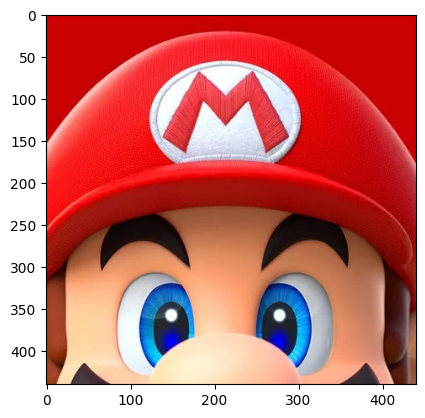

In [135]:
# Define variables to crop image
x1, y1 = 250, 40
x2, y2 = 690, 480
# Use above coordinates to crop the img_array
cropped_img_array = img_array[y1:y2, x1:x2]
plt.imshow(cropped_img_array)

Step 4:
- Find image height and width
- Find image midpoint
- Create a new array called left_half that contains the left side of the image array
- Mirror left_half and set it to the right side of
img_array


Height: 440 
Width: 440
Midpoint: [220 220]


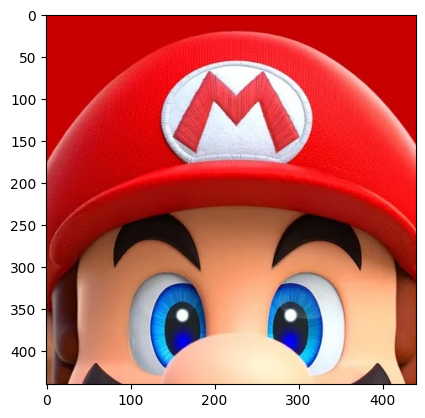

In [143]:
shape = np.shape(cropped_img_array)
print("Height:", shape[0], "\nWidth:", shape[1])
midpoint = np.array([shape[0]//2, shape[1]//2])
print("Midpoint:", midpoint)

left_half = np.array(cropped_img_array[0:697,0:466])

right_half = np.fliplr(left_half)
cropped_img_array = right_half
plt.imshow(right_half)

Step 5:
- Run the following script, **<u>do not change the values!</u>**

In [137]:
# Given image color values
red_threshold = 75
blue_threshold = 100
yellow_color = [255, 255, 0]
purple_color = [139, 46, 130]

Step 6:
- Create a for loop and loop through every pixel of img_array
- Get the RGB values of each pixel
- Find the red pixels and replace them with the color yellow

(hint) red > red_threshold, green < (red_threshold / 2), blue < (red_threshold / 2)

- Find the blue pixels and replace them with the color purple

(hint) red < blue_threshold, green < blue_threshold, blue > blue_threshold


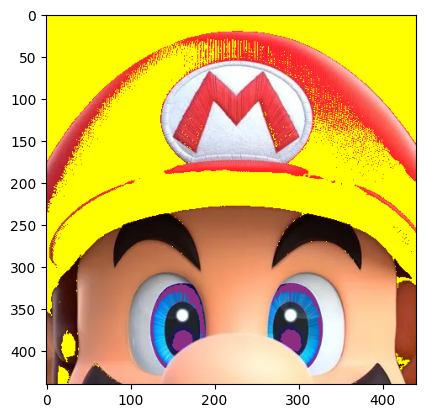

In [144]:
img_array = np.array(cropped_img_array)
height, width, _ = img_array.shape

for y in range(height):
    for x in range(width):
        pixel = img_array[y, x]

        red_value = pixel[0]
        green_value = pixel[1]
        blue_value = pixel[2]

        if (red_value > red_threshold) and (green_value < (red_threshold / 2)) and (blue_value < (red_threshold / 2)):
            img_array[y, x] = yellow_color

        if (red_value < blue_threshold) and (green_value < blue_threshold) and (blue_value > blue_threshold):
            img_array[y, x] = purple_color

plt.imshow(img_array)

Step 7:
- Now that you have cropped, mirrored, and changed some colors, take img_array and create a 2x2 grid of img_array
  - Hint: use np.hstack and np.vstack

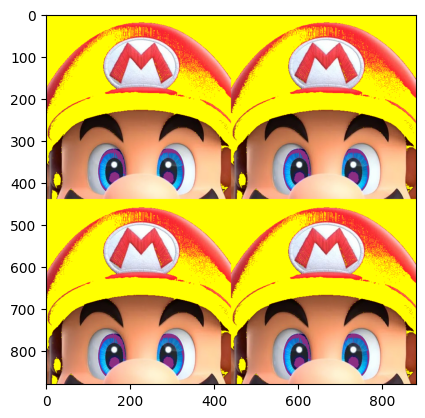

In [145]:
img_array = np.vstack([
    np.hstack([img_array, img_array]),
    np.hstack([img_array, img_array])
])
plt.imshow(img_array)

Step 8:
- Convert img_array to an Image and save as warrio.jpg
  - Hint: use Image.fromarray()

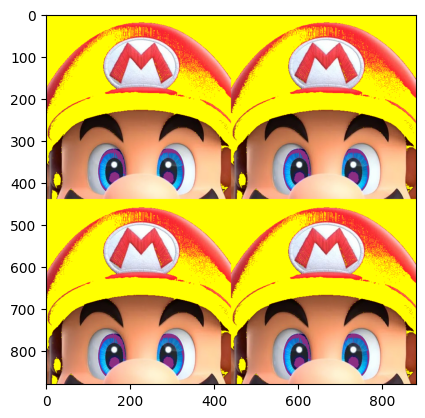

In [146]:
img_pil = Image.fromarray(np.uint8(img_array))
img_pil.save("warrio.jpg")
plt.imshow(img_pil)